<a href="https://colab.research.google.com/github/oguerra3001/Grupo-3-DAJ10-TRABAJO-FINAL/blob/main/Exploracion/An%C3%A1lisis%20exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISIS EXPLORATORIO DE DATOS RSM**

---


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importación de datos desde archivo csv almacenado en repositorio de Github

In [13]:
url = "https://raw.githubusercontent.com/GEISSNA/Grupo-3-DAJ10-TRABAJO-FINAL/main/Exploracion/consolidado.csv"
data = pd.read_csv(url)

**METRICAS DE VENTAS**

**Ventas totales**

In [ ]:
total = data['Venta Total'].sum()
print(total)

4600795.36


In [ ]:
describe = data['Venta Total'].describe()
print(describe)

count     1000.000000
mean      4600.795360
std       3886.511139
min         36.840000
25%       1477.990000
50%       3556.480000
75%       6937.800000
max      17767.710000
Name: Venta Total, dtype: float64


**Número de ventas por Región**

In [ ]:
VxRegion = data.groupby('Region')['Venta Total'].count()
print(VxRegion)

Region
Este     258
Norte    240
Oeste    259
Sur      243
Name: Venta Total, dtype: int64


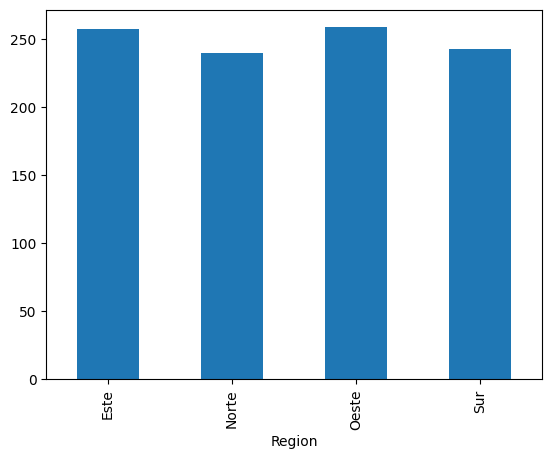

In [ ]:
BarRegion = VxRegion.plot(kind='bar')

**Cantidad de Productos vendidos**

In [ ]:
ProdVend = data['Cantidad'].sum()
print(ProdVend)

4936


**Ventas por Categoría de producto**

In [ ]:
VentasxCat = data.groupby('Categoria')['Venta Total'].sum()
print(VentasxCat)

Categoria
Electrónica    1159376.30
Hogar          1479785.05
Juguetería     1326233.65
Periféricos     635400.36
Name: Venta Total, dtype: float64


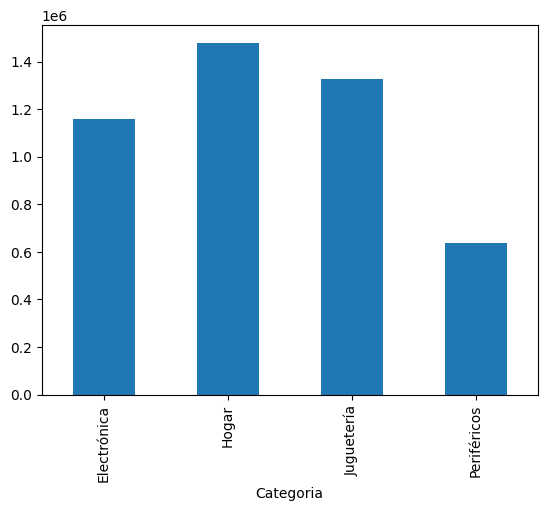

In [ ]:
barVxR = VentasxCat.plot(kind='bar')

**3.3. Generación de Visualizaciones**

**Histograma de distribución de precio unitario**

Análisis:

La mayoría de los productos tienen precios unitarios entre 750 y 1000 unidades monetarias, lo que indica que el rango de precios más común es intermedio. Esto sugiere que la empresa está enfocada en productos de valor medio, con una mayor concentración de ofertas en este segmento. A partir de este patrón, podría explorarse la oportunidad de fortalecer la oferta en este rango o ajustar la estrategia de precios para captar segmentos más amplios, tanto en precios más bajos como más altos.

   VentaID  ClienteID  ProductoID  Cantidad FechaVenta Region  ProductoID.1  \
0      101       1058         514         6   1/1/2024  Oeste           514   
1      102       1086         509         3   2/1/2024    Sur           509   
2      103       1060         527         1   3/1/2024    Sur           527   
3      104       1024         530         3   4/1/2024   Este           530   
4      105       1063         527         6   5/1/2024   Este           527   

  NombreProducto    Categoria  PrecioUnitario  ClienteID.1 NombreCliente  \
0    Producto 14        Hogar           36.84         1058    Cliente 58   
1     Producto 9   Juguetería          560.93         1086    Cliente 86   
2    Producto 27   Juguetería         1041.34         1060    Cliente 60   
3    Producto 30  Electrónica          582.82         1024    Cliente 24   
4    Producto 27   Juguetería         1041.34         1063    Cliente 63   

                   Email  Telefono      Direccion  CategoriasID  \
0

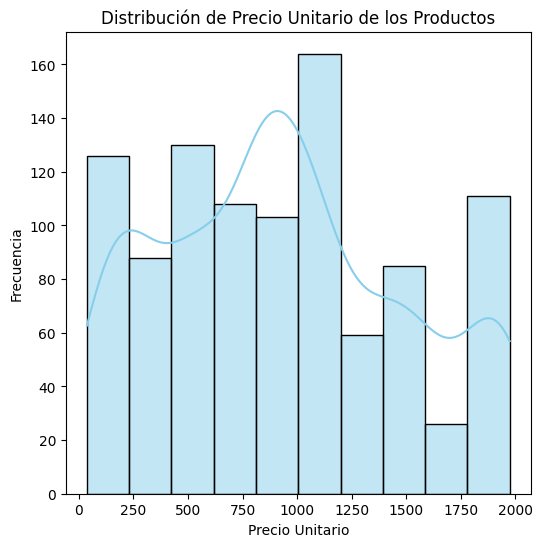

In [10]:
# Verificamos las primeras filas para asegurarnos de que los datos se han cargado correctamente
print(data.head())

# Creamos el histograma para visualizar la distribución del precio unitario de los productos
plt.figure(figsize=(6,6))  # Ajustamos el tamaño de la figura

# Utilizamos la función histplot de Seaborn para crear el histograma
sns.histplot(data['PrecioUnitario'], bins=10, kde=True, color='skyblue')

# Añadimos título y etiquetas a los ejes
plt.title('Distribución de Precio Unitario de los Productos')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()

Ventas totales por categoría y año

<Figure size 1200x800 with 0 Axes>

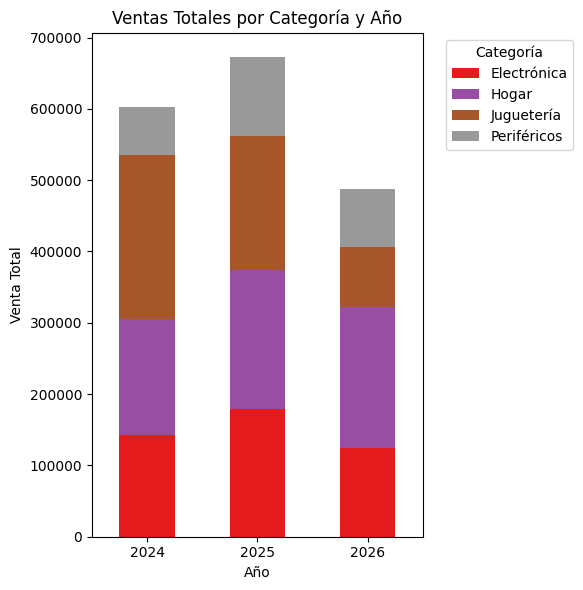

In [26]:
# Convertir la columna 'FechaVenta' a formato datetime si aún no se ha hecho
data['FechaVenta'] = pd.to_datetime(data['FechaVenta'], errors='coerce')

# Crear una nueva columna para el 'Año'
data['Año'] = data['FechaVenta'].dt.year

# Agrupar por 'Año' y 'Categoria' para obtener las ventas totales por año y categoría
ventas_por_año_categoria = data.groupby(['Año', 'Categoria'])['Venta Total'].sum().unstack().reset_index()

# Configuración del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras apiladas
ventas_por_año_categoria.set_index('Año').plot(kind='bar', stacked=True, figsize=(6,6), colormap='Set1')

# Título del gráfico
plt.title('Ventas Totales por Categoría y Año')

# Etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Venta Total')

# Mostrar el gráfico
plt.xticks(rotation=0)  # Rota las etiquetas del eje x para mejorar la legibilidad
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()



**Ventas totales por mes**

**Análisis:**

Las ventas muestran un aumento notable en enero, lo que sugiere un pico estacional o promociones exitosas. A pesar de las caídas en algunos meses, la tendencia general es positiva, lo que indica un crecimiento sostenido en las ventas a lo largo del tiempo.

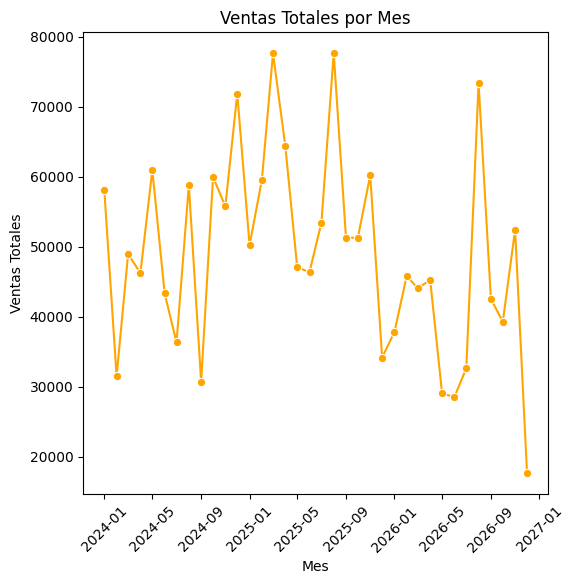

In [17]:
# Convertir la columna 'FechaVenta' a formato datetime
data['FechaVenta'] = pd.to_datetime(data['FechaVenta'], errors='coerce')

# Asegurarse de que 'Venta Total' sea numérico
data['Venta Total'] = pd.to_numeric(data['Venta Total'], errors='coerce')

# Eliminar filas con valores nulos en 'FechaVenta' o 'Venta Total'
data = data.dropna(subset=['FechaVenta', 'Venta Total'])

# Agrupar los datos por mes (extraemos el año y mes de la fecha de venta)
data['Mes'] = data['FechaVenta'].dt.to_period('M')

# Agrupar por el mes y sumar las ventas totales
ventas_por_mes = data.groupby('Mes')['Venta Total'].sum().reset_index()

# Convertir la columna 'Mes' a tipo datetime para que sea tratada adecuadamente en el gráfico
ventas_por_mes['Mes'] = ventas_por_mes['Mes'].dt.to_timestamp()

# Configuramos el tamaño de la figura para el gráfico
plt.figure(figsize=(6, 6))

# Usamos Seaborn para crear un gráfico de líneas
sns.lineplot(data=ventas_por_mes, x='Mes', y='Venta Total', marker='o', color='orange')

# Titulo del gráfico
plt.title('Ventas Totales por Mes')

# Etiqueta para el eje X (meses)
plt.xlabel('Mes')

# Etiqueta para el eje Y (ventas totales)
plt.ylabel('Ventas Totales')

# Rotamos las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45)

# Mostramos el gráfico generado
plt.show()

**Ventas por Categoría y Región**

<Figure size 600x600 with 0 Axes>

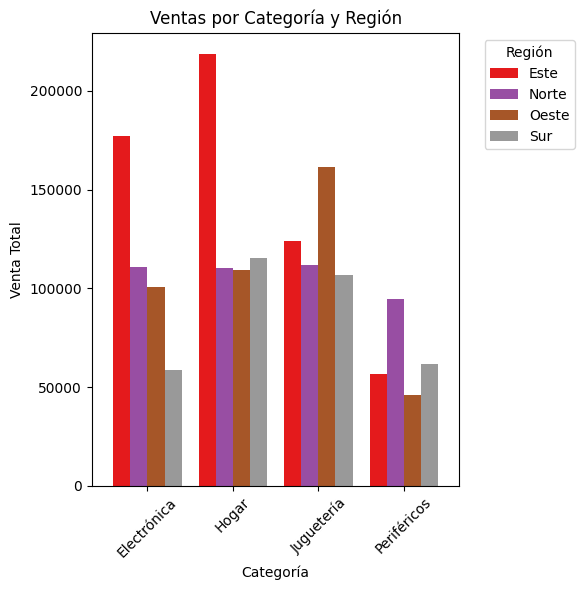

In [29]:
# Agrupar por 'Categoria' y 'Region' para obtener las ventas totales por categoría y región
ventas_por_categoria_region = data.groupby(['Categoria', 'Region'])['Venta Total'].sum().unstack().reset_index()

# Configuración del gráfico
plt.figure(figsize=(6, 6))

# Crear un gráfico de barras agrupadas
ventas_por_categoria_region.set_index('Categoria').plot(kind='bar', figsize=(6,6), colormap='Set1', width=0.8)

# Título del gráfico
plt.title('Ventas por Categoría y Región')

# Etiquetas de los ejes
plt.xlabel('Categoría')
plt.ylabel('Venta Total')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejorar la legibilidad
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para que no se corten elementos
plt.tight_layout()

# Mostrar gráfico
plt.show()
